In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./data/titanic/train.csv') 

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

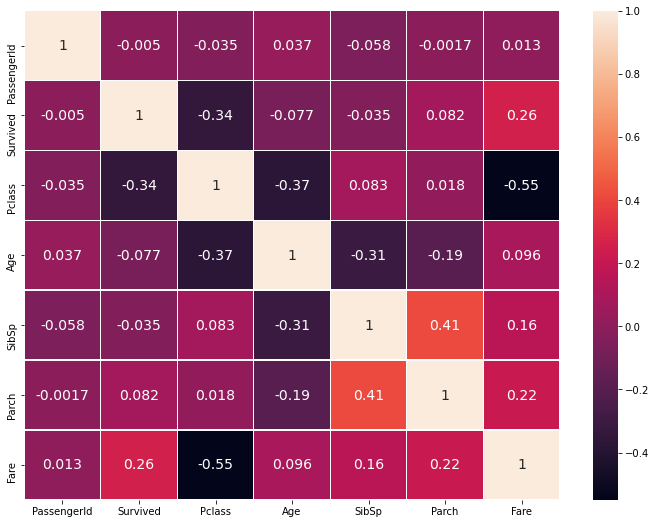

In [11]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,linewidths=0.3,annot_kws={'size':14})

## Предположение 1 - пассажиры первого класса преимуществено спаслись

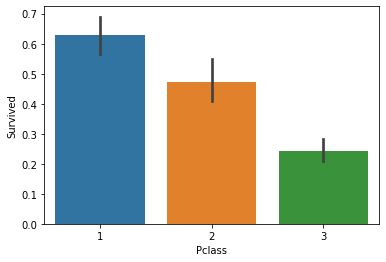

In [12]:
# построим график - да, процент выживших пассажиров 1ого класса выше остальных
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

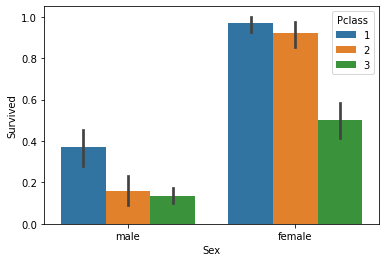

In [13]:
# построим более детальный график, доавив признак по полу
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data)
plt.show()

In [14]:
#построим выборку 1.1 - женщины 1ого класса
data_1 = data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]

In [24]:
# Вывод 1.1 - 96,8% женщин первого класса спаслись
D1 =  data_1.groupby(['Sex','Pclass'])['Survived'].agg(['sum','size'])
D1['%'] = D1['sum'] / D1['size']*100
D1

,,sum,size,%
Sex,Pclass,,,
female,2,70,76,92.105263


In [16]:
#построим выборку 1.2 - женщины 2ого класса
data_1 = data[(data['Pclass'] == 2) & (data['Sex'] == 'female')]

In [22]:
# Вывод 1.2 - 92,1% женщин второго класса спаслись
D2 =  data_1.groupby(['Sex','Pclass'])['Survived'].agg(['sum','size'])
D2['%'] = D2['sum'] / D2['size']*100
D2

,,sum,size,%
Sex,Pclass,,,
female,2,70,76,92.105263


In [18]:
#построим выборку 1.3 - женщины 1ого и 2ого класса вместе
data_2 = data[data.Pclass.isin([2, 1]) & (data['Sex'] == 'female')]

In [19]:
data_2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [21]:
# Вывод 1.3 - 94,7% женщин 1 и 2 класса спаслись
D3 =  data_2.groupby(['Sex'])['Survived'].agg(['sum','size'])
D3['%'] = D3['sum'] / D3['size']*100
D3

,sum,size,%
Sex,,,
female,161,170,94.705882


## ВЫВОД 1 - преимущественно спаслись женщины 1 и 2 класса

## Предположение 2 - мужчины третьего и второго класса преимуществено погибли

In [25]:
data_3 = data[data.Pclass.isin([2, 3]) & (data['Sex'] == 'male')]

In [26]:
data_3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [27]:
D4 =  data_3.groupby(['Sex','Pclass'])['Survived'].agg(['sum','size'])
D4['%'] = D4['sum'] / D4['size']*100
D4

sum  size          %
Sex  Pclass                      
male 2        17   108  15.740741
     3        47   347  13.544669

In [28]:
D5 =  data_3.groupby(['Sex'])['Survived'].agg(['sum','size'])
D5['%'] = D5['sum'] / D5['size']*100
D5

,sum,size,%
Sex,,,
male,64,455,14.065934


## ВЫВОД 2 - преимущественно погибли мужчины 2 и 3 класса

## Предположение 3 - преимущественно спаслись дети с родителями

In [29]:
#пассажиры с детьми или родителями
data_4 = data[data.Parch.isin([1,2,3,4,5,6])]

In [31]:
data_4.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [32]:
#удалим наны в возрасте
data_4.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [33]:
# оставим неодиноких пассажиров от 18 лет и меньше,т.е. детей на борту с родителями
data_4 = data_4.groupby(["PassengerId"]).filter(lambda x: x['Age'] <19)